# 케라스에서 MNIST 데이터셋 적재하기

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
len(train_images)

60000

In [6]:
train_labels.shape

(60000,)

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
len(train_labels)

60000

# 신경망 구조

In [9]:
from keras import models
from keras import layers

# MNIST MLP 1

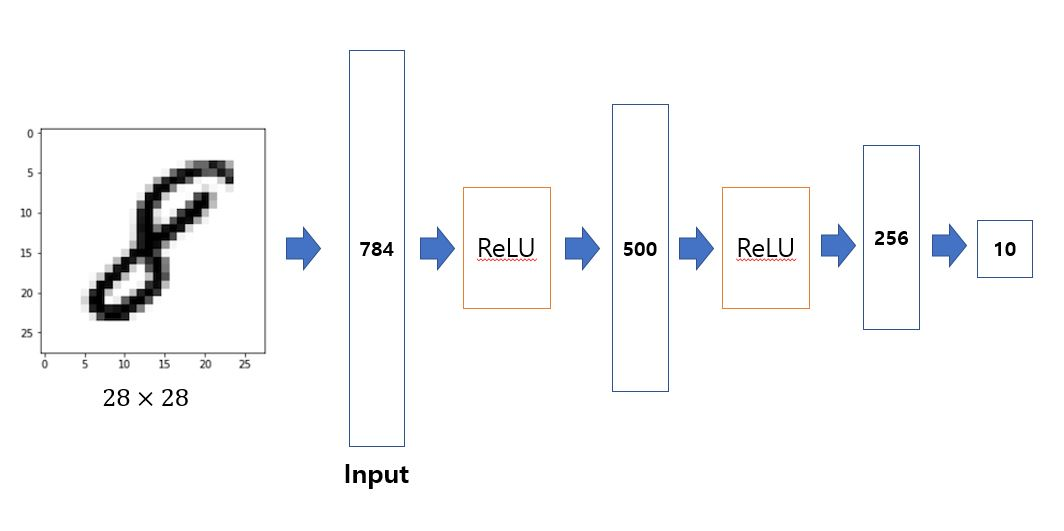

In [10]:
from IPython.display import Image
Image('./img/basic_MNIST_MLP.JPG')

In [11]:
# network = models.Sequential()
# network.add(layers.Dense(500, activation='relu', input_shape=(28*28,)))
# network.add(layers.BatchNormalization(momentum=0.9))
# network.add(layers.Dropout(0.5))
# network.add(layers.Dense(256, activation='relu', ))
# network.add(layers.BatchNormalization(momentum=0.9))
# network.add(layers.Dropout(0.5))
# network.add(layers.Dense(10, activation='softmax'))

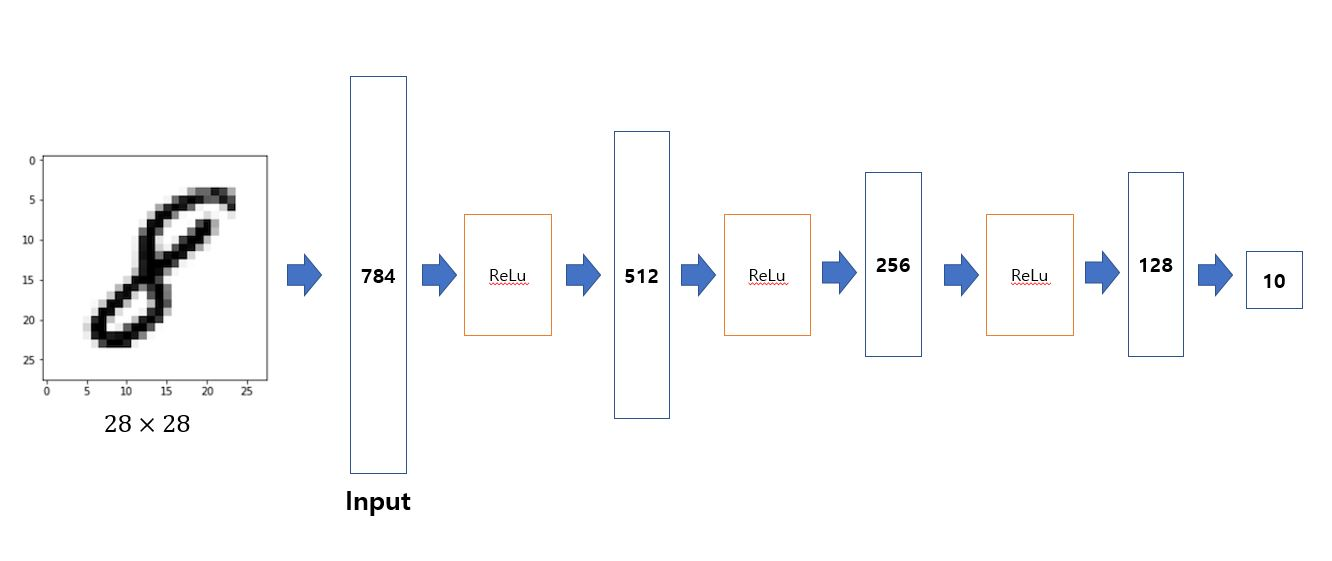

In [12]:
from IPython.display import Image
Image('./img/MNIST_MLP_model2.JPG')

In [13]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.BatchNormalization())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(256, activation='relu', ))
network.add(layers.BatchNormalization())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(128, activation='relu', ))
network.add(layers.BatchNormalization())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))

In [14]:
# 학습을 위한 optimizer와 loss function을 선택합니다. 

network.compile(optimizer='adam',

              loss='categorical_crossentropy',

              metrics=['accuracy'])

In [15]:
# 신경망은 입력 데이터의 스케일에 민감하다
# 따라서 적절한 데이타 전처리 과정이 필요하다
# 이미지의 경우 보통 픽셀의 최댓값인 255로 나누어서 사용한다

# 이미지 데이터 준비
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255



In [16]:
# 레이블 준비
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
# 학습 데이터 세트를 사용하여 모델을 학습시킵니다. 5번 반복합니다. 

network.fit(train_images, train_labels, epochs=40, batch_size=32)

Epoch 1/40
60000/60000 [==============================] - 15s 242us/step - loss: 0.4949 - accuracy: 0.8492
Epoch 2/40
60000/60000 [==============================] - 13s 223us/step - loss: 0.2719 - accuracy: 0.9184
Epoch 3/40
60000/60000 [==============================] - 15s 243us/step - loss: 0.2262 - accuracy: 0.9322
Epoch 4/40
60000/60000 [==============================] - 14s 225us/step - loss: 0.2013 - accuracy: 0.9403
Epoch 5/40
60000/60000 [==============================] - 13s 217us/step - loss: 0.1834 - accuracy: 0.9456
Epoch 6/40
60000/60000 [==============================] - 13s 221us/step - loss: 0.1727 - accuracy: 0.9488
Epoch 7/40
60000/60000 [==============================] - 14s 230us/step - loss: 0.1595 - accuracy: 0.9526
Epoch 8/40
60000/60000 [==============================] - 14s 239us/step - loss: 0.1468 - accuracy: 0.9572
Epoch 9/40
60000/60000 [==============================] - 14s 230us/step - loss: 0.1421 - accuracy: 0.9573
Epoch 10/40
60000/60000 [============

In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: ',test_acc)

10000/10000 [==============================] - 1s 108us/step
test_acc:  0.9869999885559082
